In [1]:
import tensorflow as tf

2023-06-19 08:56:09.455368: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 08:56:09.679780: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 08:56:09.680929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 08:56:11.032872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Model Training #

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2565 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1097 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9752


# Accuracy #

In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9697
0.09764240682125092 0.9696999788284302


# Saving The Model #

In [4]:
model.save('numbers.model')

INFO:tensorflow:Assets written to: numbers.model/assets


INFO:tensorflow:Assets written to: numbers.model/assets


# Test Predictions #

313/313 [==============================] - 1s 2ms/step


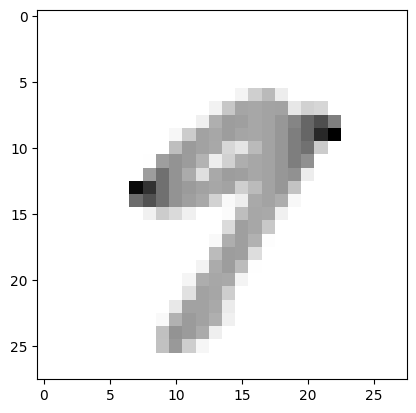

In [6]:
import matplotlib.pyplot as plt

new_model = tf.keras.models.load_model('numbers.model')
predictions = new_model.predict([x_test])

plt.imshow(x_test[20], cmap = plt.cm.binary)
plt.show()

In [8]:
import numpy as np
print(np.argmax(predictions[20]))

9


# User Images #

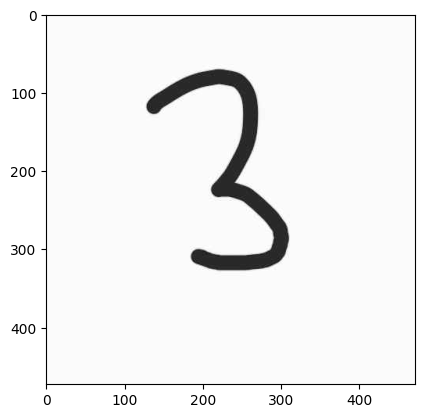

In [34]:
import cv2
import matplotlib.pyplot as plt

img_file = 'test8.jpg'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')
plt.show()

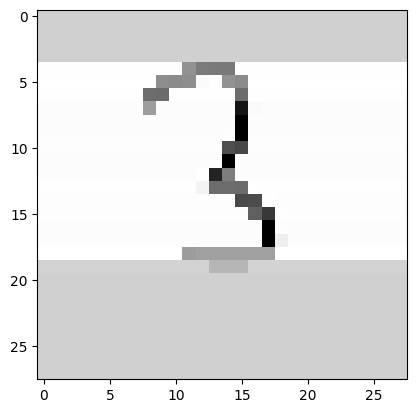

In [35]:
img_resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_LINEAR)
img_resized = np.invert(img_resized)
img_resized = tf.keras.utils.normalize(img_resized, axis = 1)

plt.imshow(img_resized, cmap = plt.cm.binary)
plt.show()

In [36]:
prediction = new_model.predict(np.array([img_resized]))
print(np.argmax(prediction))

1/1 [==============================] - 0s 27ms/step
3
